<a href="https://colab.research.google.com/github/cicerohen/hands-on-ml-book/blob/main/hands_on_chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [44]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [45]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [46]:
theta_best

array([[3.97992812],
       [3.09243369]])

In [47]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97992812],
       [10.1647955 ]])

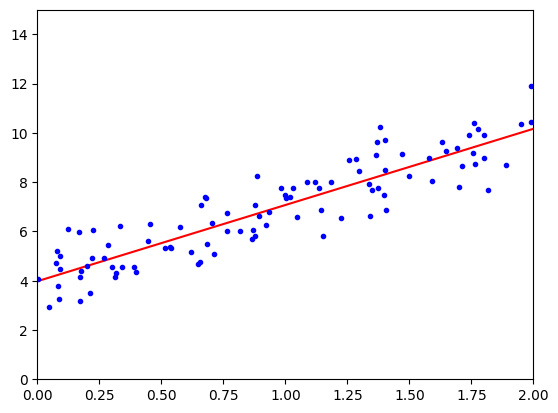

In [48]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.97992812],
       [10.1647955 ]])

### **Batch Gradient Descent implementation**

In [50]:
eta = 0.1 # learning rate
n_iterations = 1
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[1.90579019],
       [0.75875343]])

### **Stochastic Gradient Descent implementation**

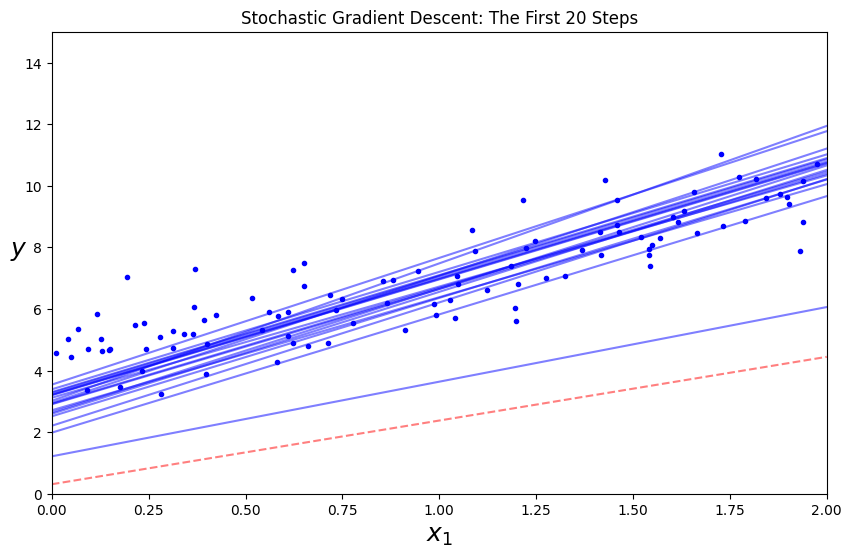

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# 2. Parameters
n_epochs = 50
t0, t1 = 5, 50
m = 100
theta = np.random.randn(2,1)

def learning_schedule(t):
    return t0 / (t + t1)

# 3. Plotting Setup
plt.figure(figsize=(10,6))
plt.plot(X, y, "b.") # Plot the data points

# 4. The SGD Loop
for epoch in range(n_epochs):
    for i in range(m):
        # This part is just for the visualization (plotting the first 20 steps)
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--" # Red dashed for start, blue for steps
            plt.plot(X_new, y_predict, style, alpha=0.5)

        # The Math
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

# 5. Final touches
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("Stochastic Gradient Descent: The First 20 Steps")
plt.show()


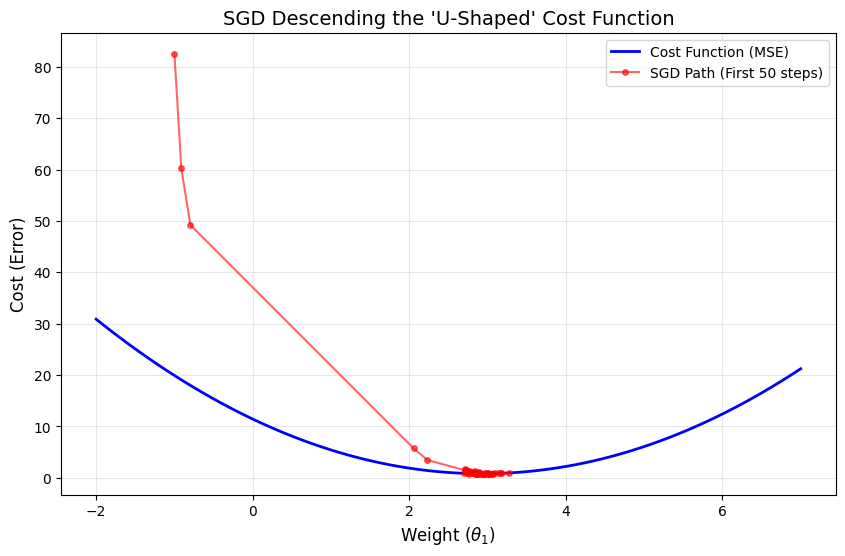

In [56]:
# 2. Parameters for SGD
n_epochs = 50
t0, t1 = 5, 50
theta = np.array([[-1.0], [-1.0]]) # Start far away from the 'bottom'

def learning_schedule(t):
    return t0 / (t + t1)

# 3. Functions to calculate the "U" (Cost Function)
def compute_cost(theta_val):
    # We fix the intercept (theta0) and vary the slope (theta1) to see the U
    errors = X_b.dot(theta_val) - y
    return (1/m) * np.sum(errors**2)

# 4. Storage for the path
theta_path = []
cost_path = []

# 5. The SGD Loop
for epoch in range(n_epochs):
    for i in range(m):
        # Record current position for the chart
        theta_path.append(theta[1, 0])
        cost_path.append(compute_cost(theta))

        # Pick random instance
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # Calculate gradients and take a step
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

# 6. Plotting the "U" curve and the SGD path
plt.figure(figsize=(10, 6))

# Generate the U-curve (The Cost Function surface)
theta1_range = np.linspace(-2, 7, 100)
u_curve_costs = [compute_cost(np.array([[4], [t1]])) for t1 in theta1_range] # Fixing theta0 at 4

plt.plot(theta1_range, u_curve_costs, "b-", linewidth=2, label="Cost Function (MSE)")
plt.plot(theta_path[:50], cost_path[:50], "r-o", markersize=4, alpha=0.6, label="SGD Path (First 50 steps)")

# Labels and Beauty
plt.title("SGD Descending the 'U-Shaped' Cost Function", fontsize=14)
plt.xlabel(r"Weight ($\theta_1$)", fontsize=12)
plt.ylabel("Cost (Error)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()